In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load the dataset
file_path = r'C:\Users\dell\Desktop\MyDocs\Docs\MK\Casino_Gaming_Data new.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,Fiscal Year,Month Ending,Licensee,Wagers,Patron Winnings,Cancelled Wagers,Online Casino Gaming Win/(Loss),Promotional Coupons or Credits Wagered (3),Promotional Deduction (4),Total Gross Gaming Revenue,Payment (5)
0,2021/22,06/30/2022 12:00:00 AM,Mohegan Tribe On-Reservation,379023,335505,5,43513,6390,6390,37123,6682
1,2021/22,06/30/2022 12:00:00 AM,MPTN On-Reservation,671843,685886,3,-14046,29041,0,-14046,0
2,2021/22,06/30/2022 12:00:00 AM,"MPI Master Wagering License CT, LLC",420056291,406814933,164727,13076631,12372142,3269158,9807473,1765345
3,2021/22,06/30/2022 12:00:00 AM,"Mohegan Digital, LLC",254393582,246515856,11645,7866081,1397441,1397441,6468640,1164355
4,2021/22,05/31/2022 12:00:00 AM,Mohegan Tribe On-Reservation,716607,681306,0,35301,4130,4130,31171,5611


In [3]:
# Check for missing values
df.isnull().sum()

# Convert 'Month Ending' to datetime format
df['Month Ending'] = pd.to_datetime(df['Month Ending'], errors='coerce')

# Display data types to ensure correct conversion
df.dtypes

Fiscal Year                                           object
Month Ending                                  datetime64[ns]
Licensee                                              object
Wagers                                                 int64
Patron Winnings                                        int64
Cancelled Wagers                                       int64
Online Casino Gaming Win/(Loss)                        int64
Promotional Coupons or Credits Wagered (3)             int64
Promotional Deduction (4)                              int64
Total Gross Gaming Revenue                             int64
Payment (5)                                            int64
dtype: object

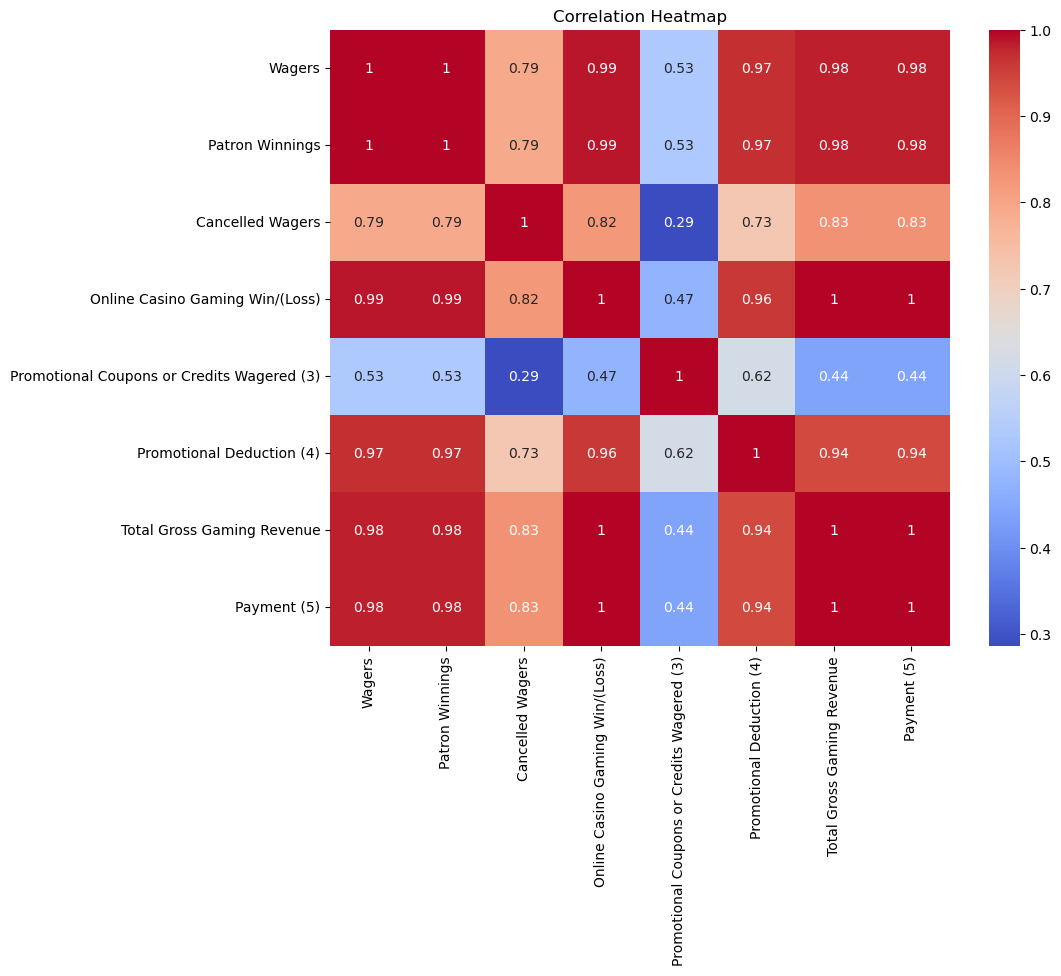

In [4]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

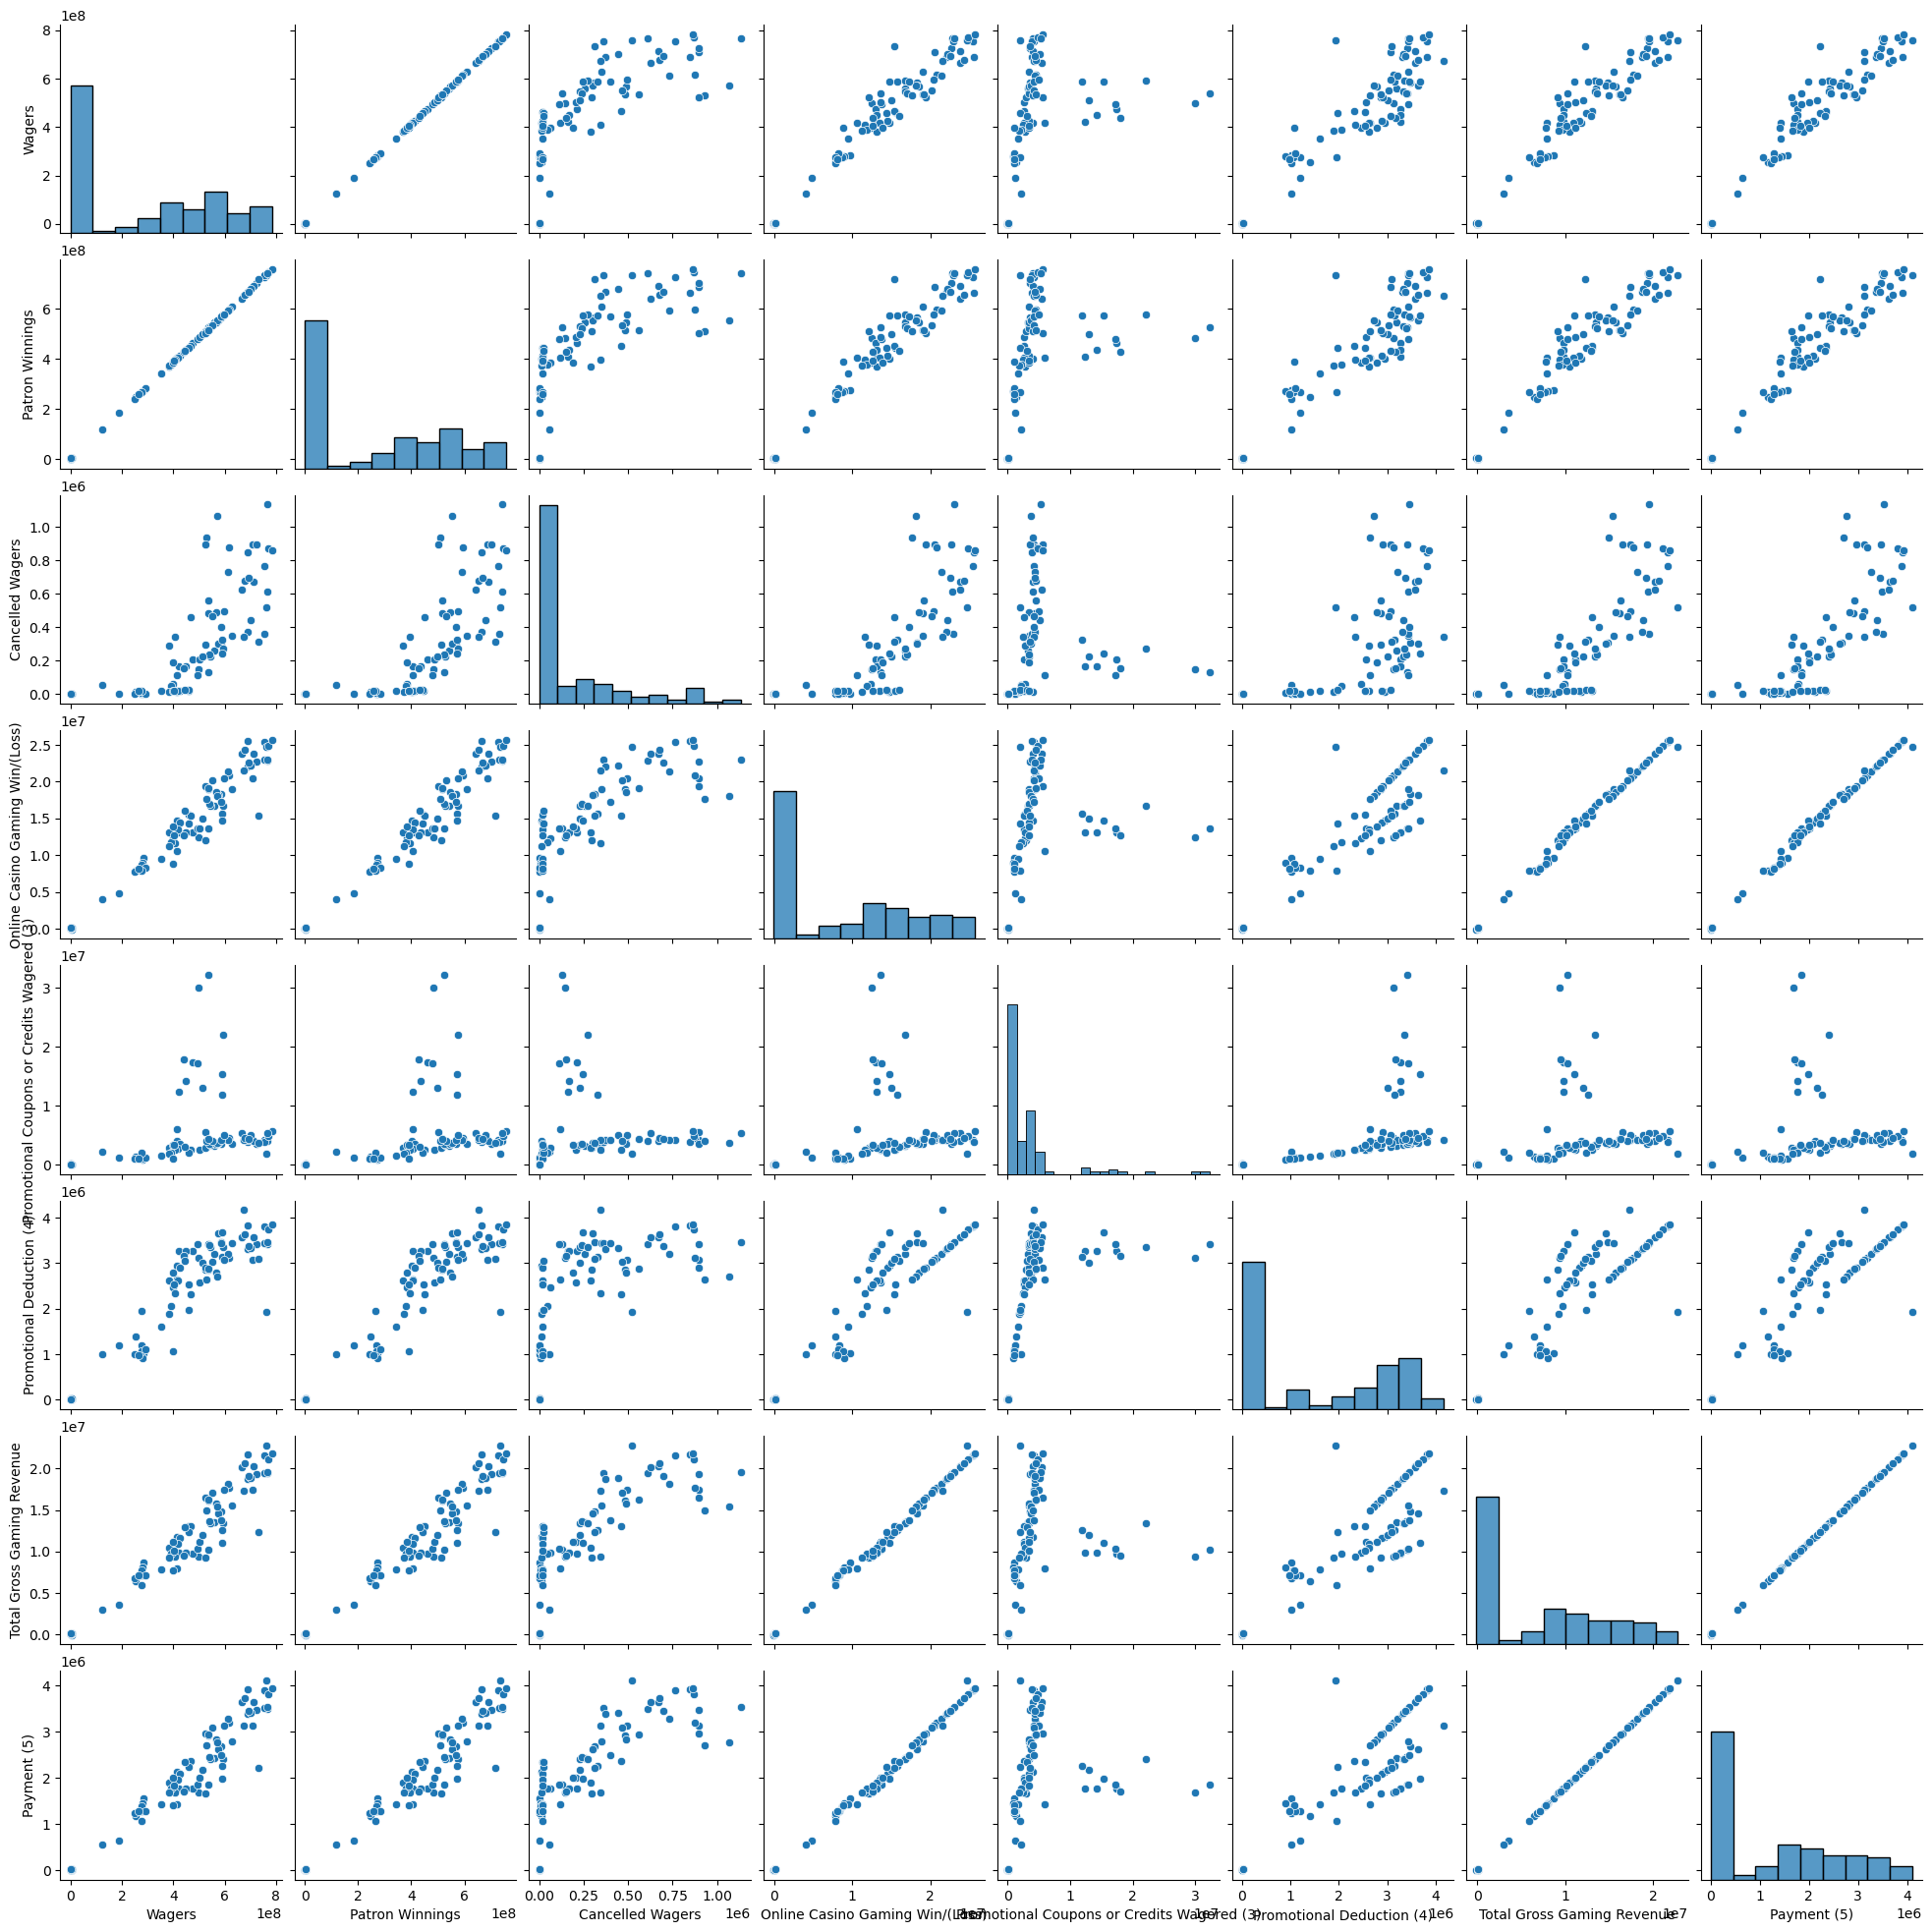

In [5]:
sns.pairplot(numeric_df)
plt.show()

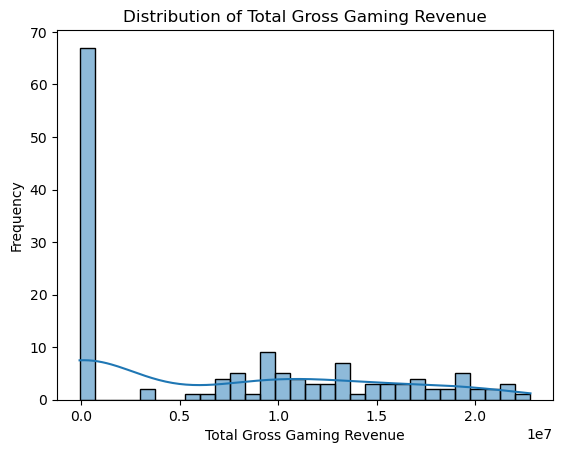

In [6]:
sns.histplot(df['Total Gross Gaming Revenue'], bins=30, kde=True)
plt.title('Distribution of Total Gross Gaming Revenue')
plt.xlabel('Total Gross Gaming Revenue')
plt.ylabel('Frequency')
plt.show()

In [7]:
df['Net Revenue'] = df['Total Gross Gaming Revenue'] - df['Promotional Deduction (4)']

# Display the first few rows to verify the new feature
df.head()

,Fiscal Year,Month Ending,Licensee,Wagers,Patron Winnings,Cancelled Wagers,Online Casino Gaming Win/(Loss),Promotional Coupons or Credits Wagered (3),Promotional Deduction (4),Total Gross Gaming Revenue,Payment (5),Net Revenue
0,2021/22,2022-06-30,Mohegan Tribe On-Reservation,379023,335505,5,43513,6390,6390,37123,6682,30733
1,2021/22,2022-06-30,MPTN On-Reservation,671843,685886,3,-14046,29041,0,-14046,0,-14046
2,2021/22,2022-06-30,"MPI Master Wagering License CT, LLC",420056291,406814933,164727,13076631,12372142,3269158,9807473,1765345,6538315
3,2021/22,2022-06-30,"Mohegan Digital, LLC",254393582,246515856,11645,7866081,1397441,1397441,6468640,1164355,5071199
4,2021/22,2022-05-31,Mohegan Tribe On-Reservation,716607,681306,0,35301,4130,4130,31171,5611,27041


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target variable
X = df[['Wagers', 'Patron Winnings', 'Cancelled Wagers', 'Promotional Coupons or Credits Wagered (3)', 'Promotional Deduction (4)', 'Payment (5)']]
y = df['Total Gross Gaming Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(0.48607487494760215, 0.9999999999999903)